In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

In [25]:
train = pd.read_csv('data/train.csv').drop('id', axis=1)
test = pd.read_csv('data/test.csv')

In [26]:
train.head()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
0,2,0,46.0,3,5,0,0,0,0,1,...,2,3,0,7,3,13,2,7,18,2350000.0
1,2,0,44.6,5,5,0,0,0,0,1,...,3,5,0,7,3,11,1,4,11,1799000.0
2,2,0,53.0,1,9,0,1,0,0,0,...,4,11,0,5,3,17,3,7,15,2800000.0
3,2,0,64.0,4,5,0,0,0,1,0,...,31,5,1,55,2,10,28,32,17,3970000.0
4,1,0,33.3,1,10,0,0,1,0,0,...,1,3,0,2,3,9,0,3,6,1880000.0


In [27]:
print(f"Количество NaN в train: {train.isna().sum().sum()}")
print(f"Количество NaN в test: {test.isna().sum().sum()}")

Количество NaN в train: 0
Количество NaN в test: 0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Количество.комнат          808 non-null    int64  
 1   Студия                     808 non-null    int64  
 2   Общая.площадь              808 non-null    float64
 3   Этаж                       808 non-null    int64  
 4   Этажей.в.доме              808 non-null    int64  
 5   Парковка                   808 non-null    int64  
 6   Без.ремонта                808 non-null    int64  
 7   Дизайнерский               808 non-null    int64  
 8   Евроремонт                 808 non-null    int64  
 9   Косметический              808 non-null    int64  
 10  Балкон                     808 non-null    int64  
 11  Лоджия                     808 non-null    int64  
 12  Совмещенный.санузел        808 non-null    int64  
 13  Раздельный.санузел         808 non-null    int64  

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         783 non-null    int64  
 1   Количество.комнат          783 non-null    int64  
 2   Студия                     783 non-null    int64  
 3   Общая.площадь              783 non-null    float64
 4   Этаж                       783 non-null    int64  
 5   Этажей.в.доме              783 non-null    int64  
 6   Парковка                   783 non-null    int64  
 7   Без.ремонта                783 non-null    int64  
 8   Дизайнерский               783 non-null    int64  
 9   Евроремонт                 783 non-null    int64  
 10  Косметический              783 non-null    int64  
 11  Балкон                     783 non-null    int64  
 12  Лоджия                     783 non-null    int64  
 13  Совмещенный.санузел        783 non-null    int64  

In [30]:
train.describe()

,Количество.комнат,Студия,Общая.площадь,Этаж,Этажей.в.доме,Парковка,Без.ремонта,Дизайнерский,Евроремонт,Косметический,...,Одежда..1000,Супер3кет.1000,Кинотеатр.1000,Кафе.1000,АЗС.1000,Детский.сад.1000,Бар.1000,Банк.1000,Аптека.1000,Цена
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,2.039604,0.040842,50.781176,4.894802,8.935644,0.142327,0.101485,0.024752,0.101485,0.772277,...,10.372525,4.674505,0.143564,7.788366,2.501238,13.263614,4.149752,6.754950,13.470297,2.699083e+06
std,0.996109,0.198046,19.827507,3.760826,4.754526,0.349601,0.302157,0.155466,0.302157,0.419622,...,15.397133,3.255991,0.378064,8.983450,1.636025,7.557860,5.955523,6.873569,8.068579,1.096460e+06
min,1.000000,0.000000,10.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.990000e+05
25%,1.000000,0.000000,37.650000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,2.000000,2.000000,0.000000,3.000000,1.000000,8.000000,1.000000,2.000000,7.000000,1.950000e+06
50%,2.000000,0.000000,48.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,4.000000,4.000000,0.000000,6.000000,2.000000,13.000000,3.000000,5.000000,12.000000,2.550000e+06
75%,3.000000,0.000000,63.075000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,12.000000,7.000000,0.000000,9.000000,4.000000,18.000000,5.000000,10.000000,19.000000,3.310000e+06
max,5.000000,1.000000,120.000000,24.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,86.000000,14.000000,2.000000,67.000000,8.000000,42.000000,52.000000,40.000000,40.000000,6.800000e+06


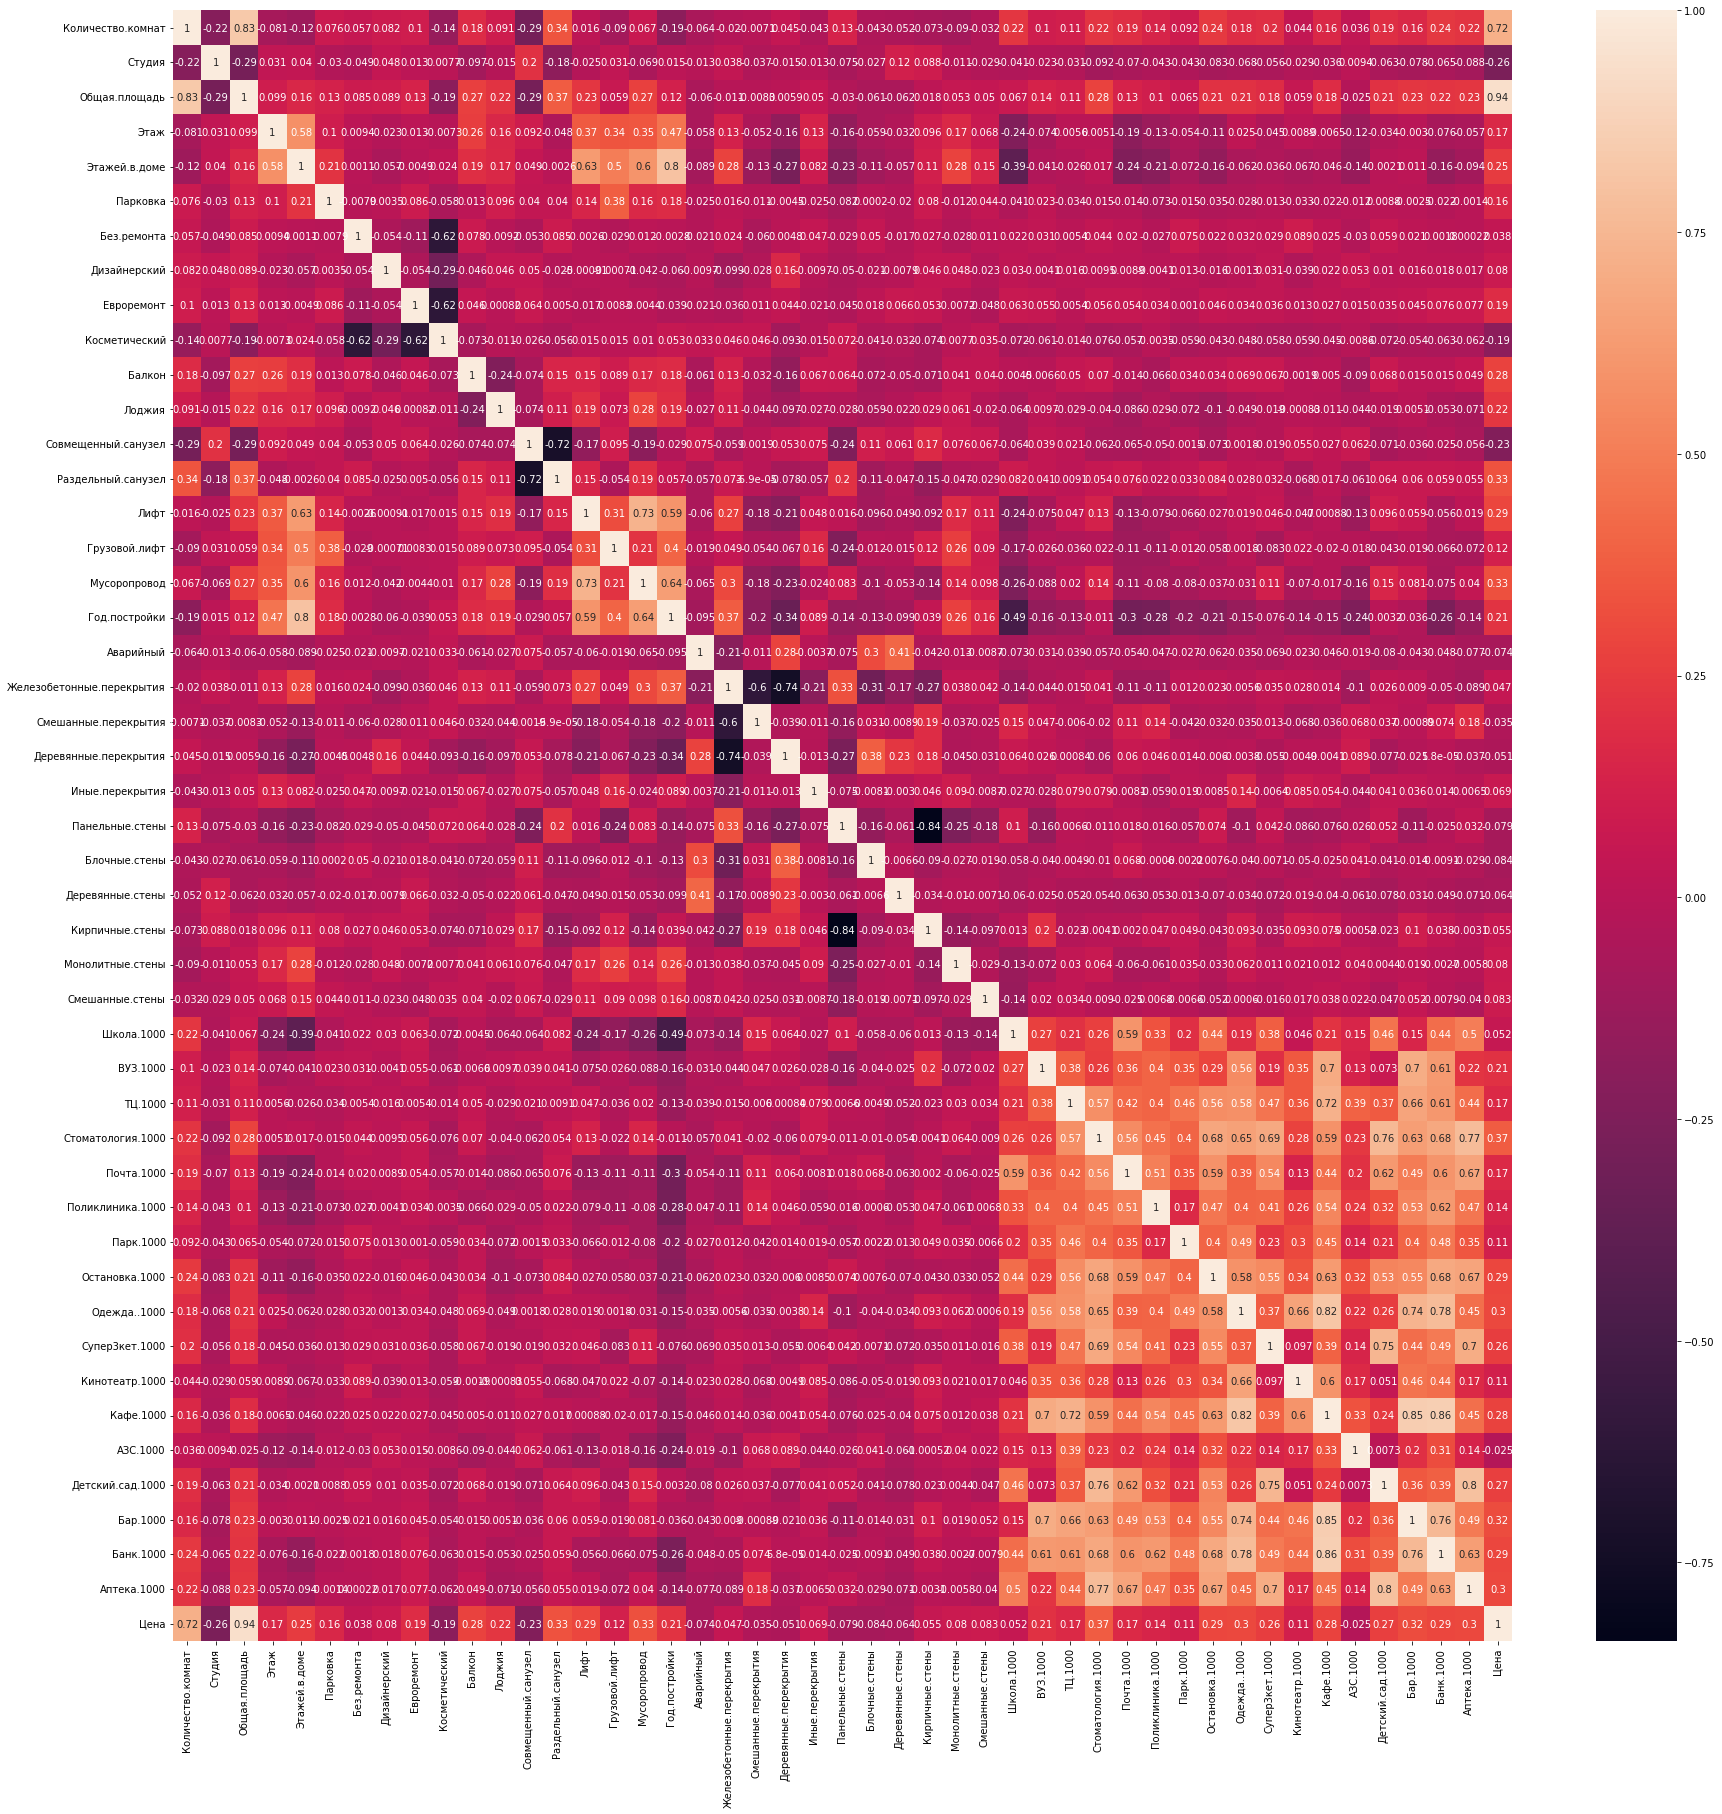

In [31]:
fig, hm = plt.subplots(figsize = (30,30))
hm = sns.heatmap(train.corr(method='pearson'),cbar=True,annot=True)

In [32]:
to_drop = ['Лифт',
           'Железобетонные.перекрытия',
           'Смешанные.стены',
           'Кирпичные.стены',
           'Монолитные.стены',
           'Деревянные.перекрытия',
           'Совмещенный.санузел',
           'Раздельный.санузел',
           'Мусоропровод',
          'Школа.1000']
train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop, axis=1, inplace=True)

In [33]:
target = ['Цена']
all_features = list(train.drop("Цена", axis=1).columns)
x_train, x_val, y_train, y_val = train_test_split(train[all_features], train[target], train_size=0.7)

## Линейная регрессия

In [34]:
sfs = SequentialFeatureSelector(LinearRegression(), n_features_to_select=10, scoring='neg_root_mean_squared_error', cv=5)
sfs.fit(train[all_features], train['Цена'])
reg_features = list(sfs.get_feature_names_out())
reg_features

['Количество.комнат',
 'Общая.площадь',
 'Этажей.в.доме',
 'Без.ремонта',
 'Евроремонт',
 'Год.постройки',
 'ВУЗ.1000',
 'Стоматология.1000',
 'Остановка.1000',
 'Одежда..1000']

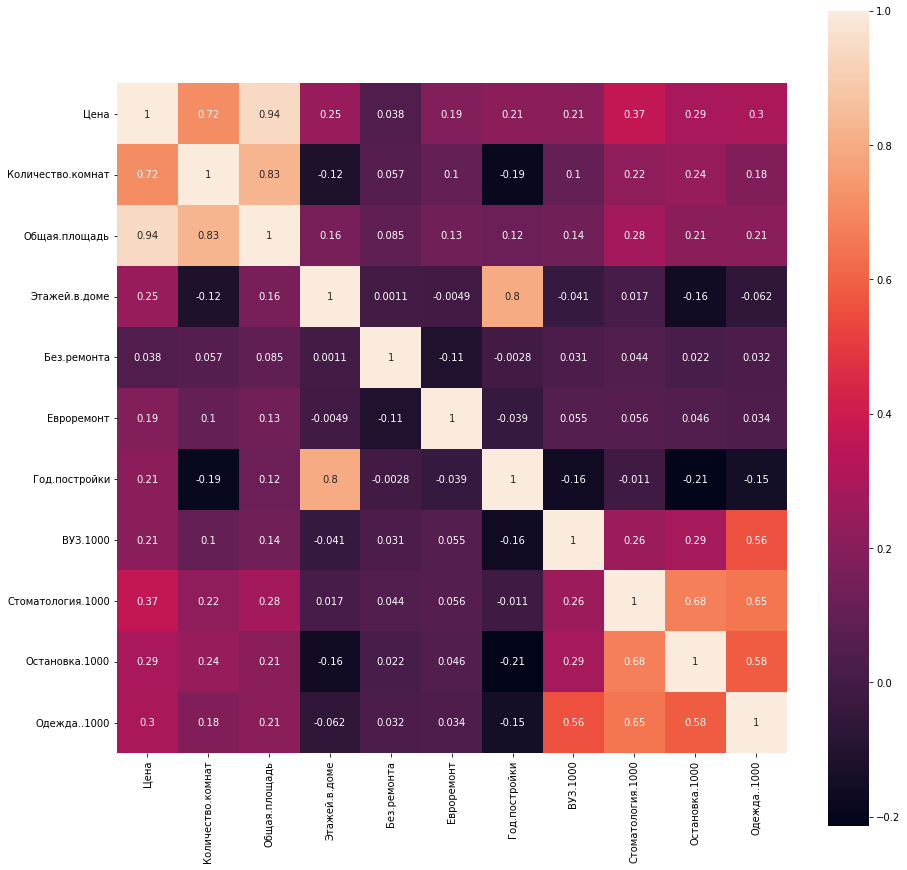

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(train[target + reg_features].corr(), square=True, annot=True)
plt.show()

In [36]:
const = sm.add_constant(x_train[reg_features])
sm.OLS(y_train, const).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     689.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          5.20e-305
Time:                        14:44:11   Log-Likelihood:                -7937.8
No. Observations:                 565   AIC:                         1.590e+04
Df Residuals:                     554   BIC:                         1.595e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.415e+06   2.29e+06     -3.237      0.001   -1.19e+07   -2.92e+06
Количество.комнат -1.424e+05   2.74e+04     -5.192      0.000   -1.96e+05   -8.85e+04
Общая.площадь      5.446e+04   1395.456     39.027      0.000    5.17e+04    5.72e+04
Этажей.в.доме      9173.9266   4559.634      2.012      0.045     217.642    1.81e+04
Без.ремонта       -1.203e+05   4.35e+04     -2.763      0.006   -2.06e+05   -3.48e+04
Евроремонт         2.275e+05   4.32e+04      5.272      0.000    1.43e+05    3.12e+05
Год.постройки      3666.2234   1168.350      3.138      0.002    1371.286    5961.161
ВУЗ.1000           6983.8631   2633.599      2.652      0.008    1810.802    1.22e+04
Стоматология.1000  7875.9773   3036.169      2.594      0.010    1912.166    1.38e+04
Остановка.1000     1.706e+04   3649.909      4.674      0.000    9890.546    2.42e+04
Одежда..1000       2363.4200   1288.628      1.834      0.067    -167.775    4894.615
==============================================================================
Omnibus:                        7.621   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                9.761
Skew:                          -0.135   Prob(JB):                      0.00759
Kurtosis:                       3.584   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
results = cross_validate(LinearRegression(),
                         x_train[reg_features],
                         y_train,
                         scoring='neg_root_mean_squared_error',
                         return_estimator=True)
reg = results["estimator"][results['test_score'].argmax()]

In [38]:
print(f"Test score for Linear regression - {results['test_score'].mean() * -1}")

Test score for Linear regression - 312556.47227638774


## Elastic Net

In [39]:
params = {'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}

In [40]:
grid = GridSearchCV(estimator = ElasticNet(), param_grid = params, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(x_train, y_train).best_params_

{'l1_ratio': 0.75}

In [41]:
print(f"Test score for ElasticNet - {grid.best_score_ * -1}")

Test score for ElasticNet - 319621.1189505413


In [42]:
const = sm.add_constant(x_train)
sm.OLS(y_train, const).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Цена   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     206.3
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          2.44e-283
Time:                        14:44:12   Log-Likelihood:                -7913.4
No. Observations:                 565   AIC:                         1.590e+04
Df Residuals:                     529   BIC:                         1.605e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.052e+06   2.05e+06     -1.979      0.048   -8.07e+06   -3.02e+04
Количество.комнат    -1.313e+05   2.88e+04     -4.556      0.000   -1.88e+05   -7.47e+04
Студия               -6.976e+04    6.7e+04     -1.041      0.298   -2.01e+05    6.19e+04
Общая.площадь         5.283e+04   1517.044     34.822      0.000    4.98e+04    5.58e+04
Этаж                  1881.7880   4319.650      0.436      0.663   -6603.986    1.04e+04
Этажей.в.доме         4724.5042   5271.595      0.896      0.371   -5631.325    1.51e+04
Парковка              5.573e+04   4.13e+04      1.349      0.178   -2.54e+04    1.37e+05
Без.ремонта          -1.201e+06   5.14e+05     -2.335      0.020   -2.21e+06   -1.91e+05
Дизайнерский         -9.365e+05   5.14e+05     -1.823      0.069   -1.95e+06    7.29e+04
Евроремонт           -8.399e+05   5.13e+05     -1.638      0.102   -1.85e+06    1.68e+05
Косметический        -1.074e+06   5.14e+05     -2.089      0.037   -2.08e+06   -6.39e+04
Балкон                3.785e+04   2.34e+04      1.618      0.106   -8093.883    8.38e+04
Лоджия                9.385e+04   3.69e+04      2.544      0.011    2.14e+04    1.66e+05
Грузовой.лифт         4.695e+04   5.06e+04      0.927      0.354   -5.25e+04    1.46e+05
Год.постройки         2566.6981   1299.166      1.976      0.049      14.541    5118.855
Аварийный            -3.371e+04    3.2e+05     -0.105      0.916   -6.62e+05    5.95e+05
Смешанные.перекрытия -2.645e+04   8.41e+04     -0.314      0.753   -1.92e+05    1.39e+05
Иные.перекрытия      -6897.4024   1.91e+05     -0.036      0.971   -3.83e+05    3.69e+05
Панельные.стены      -4.402e+04   3.06e+04     -1.440      0.151   -1.04e+05     1.6e+04
Блочные.стены         -1.79e+05   1.02e+05     -1.750      0.081    -3.8e+05    2.19e+04
Деревянные.стены      1.204e+05    3.2e+05      0.376      0.707   -5.09e+05     7.5e+05
ВУЗ.1000              1.069e+04   4102.760      2.604      0.009    2625.510    1.87e+04
ТЦ.1000              -2.922e+04   1.35e+04     -2.159      0.031   -5.58e+04   -2632.518
Стоматология.1000     1.667e+04   5318.425      3.135      0.002    6225.632    2.71e+04
Почта.1000           -1.731e+04    1.7e+04     -1.021      0.308   -5.06e+04     1.6e+04
Поликлиника.1000      7644.0714   1.07e+04      0.713      0.476   -1.34e+04    2.87e+04
Парк.1000             4855.1209   1.84e+04      0.263      0.792   -3.14e+04    4.11e+04
Остановка.1000        2.295e+04   4309.732      5.324      0.000    1.45e+04    3.14e+04
Одежда..1000          1273.0015   1970.467      0.646      0.519   -2597.899    5143.902
Супер3кет.1000        1.382e+04   6655.422      2.076      0.038     745.230    2.69e+04
Кинотеатр.1000       -7341.3495   5.03e+04     -0.146      0.884   -1.06e+05    9.14e+04
Кафе.1000             1.123e+04   5070.901      2.215    

## Результаты

In [44]:
test_id = test['id']
y_test_predicted = list(reg.predict(test[reg_features]).flat)
y_test_predicted
submission = pd.DataFrame({'id': test_id,'Price': y_test_predicted})
submission.to_csv("output/sub.csv", index=False)